# Causal Inference full spec(因果推論フルスペック)
## we can do Causal Inference using this python program

# ＊-Learner  
### https://econml.azurewebsites.net/_autosummary/econml.metalearners.html

In [92]:
from econml.metalearners import TLearner, SLearner, XLearner, DomainAdaptationLearner

In [102]:
from econml.data.dgps import ihdp_surface_B

In [120]:
Yt

array([19.04345696, 12.90747173,  7.70742717,  5.33921416, 12.58384973,
        8.45908469, 28.23000283, 17.52877756, 23.82920307, 11.34384365,
       14.55804554, 22.86323858,  8.92981458, 24.44652012,  7.71033621,
        8.07500634, 16.23425205,  9.81181585, 18.58097208, 23.51078831,
       24.4998885 , 16.305729  , 18.51951057, 17.2354491 , 11.00013502,
       13.29205721, 18.7170301 , 27.77130308, 23.2716476 ,  9.06393264,
       15.9585015 ,  8.40181274, 18.58719163, 10.43341531, 28.93259944,
       15.19943296,  7.37764642, 15.92563771, 23.60346643, 20.03049795,
        8.94053424, 18.33658115, 18.50566819, 17.97768023, 19.09269098,
       19.31012094, 26.001979  ,  8.07591931, 19.01885494, 19.03498535,
       20.52705092, 29.31236398, 13.21494153, 20.13148834, 14.18369041,
       12.27911607, 29.36968748, 15.68404125, 20.20288742, 16.51428151,
        9.88568148,  7.05623408,  6.92601388, 19.76048708, 12.43881349,
        8.56094816, 18.63985792, 20.55836415, 11.01296134, 11.43

## T-Learner  
### https://blog.uni-3.app/2020/02/29/causalml-tlearner-ate/
### https://github.com/microsoft/EconML/blob/master/notebooks/Metalearners%20Examples.ipynb

In [12]:
# READING
data_df = pd.read_csv('https://github.com/iwanami-datascience/vol3/raw/master/kato%26hoshino/q_data_x.csv')
data_df.head()

,cm_dummy,gamedummy,area_kanto,area_keihan,area_tokai,area_keihanshin,age,sex,marry_dummy,job_dummy1,...,T,F1,F2,F3,M1,M2,M3,TVwatch_day,gamesecond,gamecount
0,0,0,0,0,0,1,44.5,1,1,1,...,0,0,0,0,0,1,0,33.427600,0,0
1,0,0,0,1,0,0,34.5,1,1,1,...,0,0,0,0,0,1,0,31.542862,0,0
2,0,0,0,1,0,0,24.5,1,0,0,...,0,0,0,0,1,0,0,37.825805,0,0
3,0,0,0,1,0,0,44.5,1,1,1,...,0,0,0,0,0,1,0,36.345911,0,0
4,0,0,0,1,0,0,34.5,1,1,1,...,0,0,0,0,1,0,0,49.344942,0,0


In [17]:
# 説明変数と目的変数を指定
cols = ["child_dummy", "area_kanto", "area_tokai", "area_keihanshin",
        "T", "F1", "F2", "F3", "M1", "M2"]

X = data_df[cols]
y = pd.DataFrame(data_df.gamesecond)

# CMありをtreatment, CMなしをcontrolとする
treat =  data_df["cm_dummy"]

In [43]:
# train, test半分ずつに分ける
y_train, y_test, train_treat, test_treat, X_train, X_test = train_test_split(y.values, treat, X, test_size=0.3, random_state=2)

In [44]:
# 整形
y_train =  pd.DataFrame(y_train[:,0])
y_test  =  pd.DataFrame(y_test[:,0])

X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)

train_treat  = train_treat.reset_index(drop=True)
test_treat = test_treat.reset_index(drop=True)

In [129]:
y_train_np =  y_train.values[:,0]

In [136]:
test = train_treat.values

In [137]:
test

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [138]:
# 整形２＿numpyデータ作成
y_train_np =  y_train.values[:,0]
y_test_np  =  y_test.values[:,0]

X_train_np = X_train.values
X_test_np  = X_test.values

train_treat_np  = train_treat.values
test_treat_np   = test_treat.values

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

# T-learnerを初期化.
models = GradientBoostingRegressor(n_estimators=100, max_depth=6, min_samples_leaf=15)
T_learner = TLearner(models)

In [61]:
# 学習 (fit methodの引数に介入有無を表す変数Tがあるのがsklearnとの違い)
T_learner.fit(y_train, train_treat , X_train)
# CATEを推定.
cate_pred = T_learner.effect(X_test)

C:\Users\araik\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\araik\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


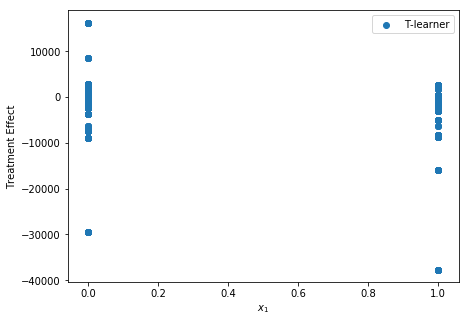

In [78]:
### Comparison plot of the different learners
plt.figure(figsize=(7, 5))
plt.scatter(X_test.iloc[:, 0], cate_pred, label="T-learner")
plt.xlabel('$x_1$')
plt.ylabel('Treatment Effect')
plt.legend()
plt.show()

In [87]:
#実測値と予測値とのズレ、結構大きい。改善点「予測式に「0以上」を追加する。ベイズ」

## X-Learner  
### https://qiita.com/shin_mura/items/e9568ff8b478e15b0950

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
# Instantiate X learner
models = GradientBoostingRegressor(n_estimators=100, max_depth=6, min_samples_leaf=15 )
propensity_model = RandomForestClassifier(n_estimators=100, max_depth=6, 
                                                  min_samples_leaf=15,
                                                  class_weight='balanced_subsample')
X_learner = XLearner(models=models, propensity_model=propensity_model)
# Train X_learner
X_learner.fit(y_train_np, train_treat_np, X_train_np)
# CATEを推定.
cate_predX = X_learner.effect(X_test)

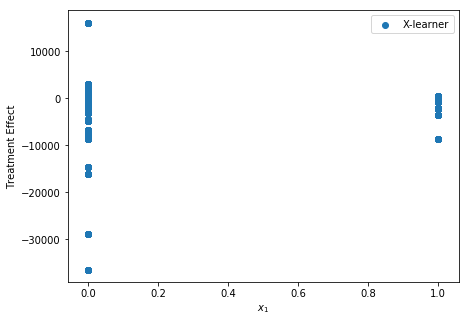

In [145]:
### Comparison plot of the different learners
plt.figure(figsize=(7, 5))
plt.scatter(X_test.iloc[:, 5], cate_predX, label="X-learner")
plt.xlabel('$x_1$')
plt.ylabel('Treatment Effect')
plt.legend()
plt.show()

In [146]:
#X-Learnerは、傾向スコアによる交絡因子の補正が可能である。

## DoublyRobustLearner  
### https://qiita.com/shin_mura/items/e9568ff8b478e15b0950